DAY 19 - Mar 15, 2015

I have installed a database, imported data, and learned how to extract data. I am now able to ask questions of the data such as what is predictive of high salary.

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Load libs
import psycopg2
import pandas.io.sql as pdsql

# Specify our database
dbname="hr"
name_of_table = "survey"

# Connect to database
conn = psycopg2.connect(dbname=dbname)

# Make database query
the_frame = pdsql.read_sql_query("SELECT * FROM %s;" % name_of_table, conn)
the_frame.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left_workplace,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,False,True,False,sales,low
1,2,0.80,0.86,5,262,6,False,True,False,sales,medium
2,3,0.11,0.88,7,272,4,False,True,False,sales,medium
3,4,0.72,0.87,5,223,5,False,True,False,sales,low
4,5,0.37,0.52,2,159,3,False,True,False,sales,low


### What is in my data?

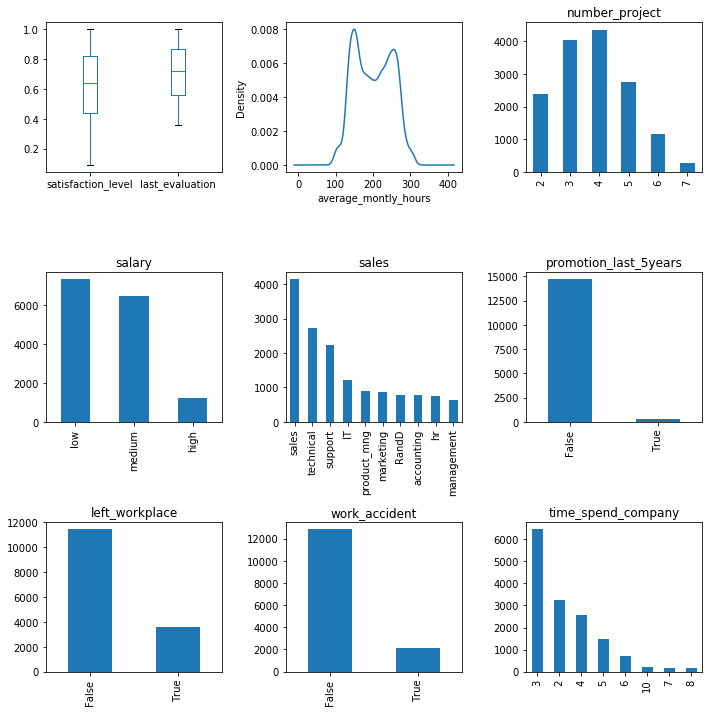

In [4]:
plt.rcParams["figure.figsize"] = [10,10]
fig, ax = plt.subplots(nrows=3, ncols=3)

the_frame.iloc[:,1:3].plot.box(ax=ax[0,0])

the_frame["average_montly_hours"].plot.kde(ax=ax[0,1])
ax[0,1].set(xlabel = "average_montly_hours")

features = ['number_project', 'time_spend_company', 'work_accident', 'left_workplace', 'promotion_last_5years', 'sales', 'salary']

for i in range(1,3):
    for j in range(3):
        feature = features.pop()
        
        the_frame[feature].value_counts(sort=True).plot(kind='bar', ax=ax[i,j])
        ax[i,j].set(title = feature)

feature = features.pop()
the_frame[feature].value_counts(sort=False).plot(kind='bar', ax=ax[0,2])
ax[0,2].set(title = feature)

plt.tight_layout()

### Answering simple questions:

1. Do people who work more hours tend to get higher salary?
2. Are people with high salary more happy (higher satisifaction level)? 
3. What department has more work accidents?



----

In [5]:
print("# Mean", the_frame.groupby('salary').average_montly_hours.mean(), sep="\n")
print("", "# Median", the_frame.groupby('salary').average_montly_hours.median(), sep="\n")

# Mean
salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

# Median
salary
high      199
low       199
medium    201
Name: average_montly_hours, dtype: int64


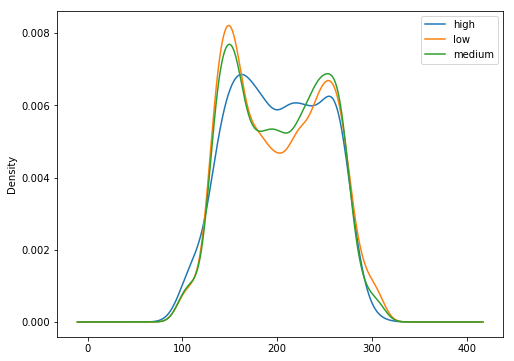

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in the_frame.groupby('salary'):
    df.average_montly_hours.plot(kind="kde", ax=ax, label=label)
plt.legend()

People with higher salary does not seem to be working more average_montly_hours

----

In [7]:
print("# Mean", the_frame.groupby('salary').satisfaction_level.mean(), sep="\n")
print("", "# Median", the_frame.groupby('salary').satisfaction_level.median(), sep="\n")

# Mean
salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

# Median
salary
high      0.66
low       0.63
medium    0.66
Name: satisfaction_level, dtype: float64


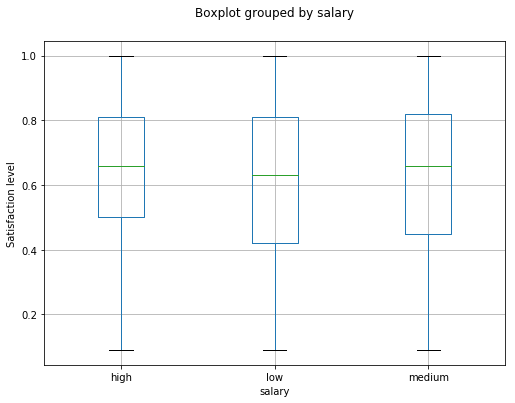

In [8]:
plt.rcParams["figure.figsize"] = [8,6]
the_frame[['satisfaction_level','salary']].boxplot(column="satisfaction_level", by="salary")
plt.ylabel("Satisfaction level")
plt.title("")

Satisfaction tends to be slightly higher with higher salary.

----

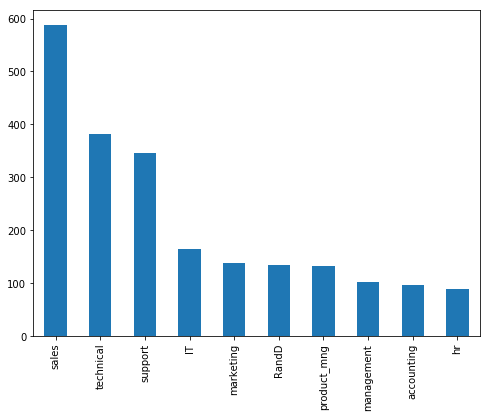

In [9]:
plt.rcParams["figure.figsize"] = [8,6]

# Make database query
the_frame_accident = pdsql.read_sql_query("SELECT * FROM %s WHERE work_accident = 'True';" % name_of_table, conn)
the_frame_accident['sales'].value_counts().plot(kind='bar')

Sales and technical has the most cases with accidents